In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 타이타닉

## 78% accuracy

* survival 
* pclass = 티켓 클래스
* sex = 성
* Age = 나이
* sibsp = 배에 탄 형제나 배우자의 수
* parch = 배에 탄 부모나 자식의 수 
* ticket = 티켓 번호
* fare = 낸 돈
* cabin = 객실 번호 
* embarked = 승선 한 항구 ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [0]:
data_train = pd.read_csv('/content/gdrive/My Drive/datascience/task/titanic/data/train.csv')
X_test = pd.read_csv('/content/gdrive/My Drive/datascience/task/titanic/data/test.csv')
test_PassengerId = X_test['PassengerId']


In [24]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
print(data_train.isna().sum())
print(X_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [0]:
y_train = data_train.iloc[:,1]
X_train = data_train

In [29]:
a = "20151231235919"
print(a[0:4])
print(a[4:6])


2015
12


# ------------------못함-----------------------------

### Cabin을 써줘야 할거같은데

In [0]:
# len(X_train['Cabin'].unique())

# X_train['Cabin'].value_counts()


f = lambda x : str(x)[0]
X_train['Cabin'] = X_train.loc[pd.notnull(X_train['Cabin']) ,'Cabin'].apply(f)
X_test['Cabin'] = X_test['Cabin'].apply(f)


X_train.loc[pd.notnull(X_train['Cabin'])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D,C


In [0]:
C = X_train.loc[X_train['Cabin']=='C']
D = X_train.loc[X_train['Cabin']=='D']
E = X_train.loc[X_train['Cabin']=='E']
F = X_train.loc[X_train['Cabin']=='F']
G = X_train.loc[X_train['Cabin']=='G']
A = X_train.loc[X_train['Cabin']=='A']
B = X_train.loc[X_train['Cabin']=='B']
T = X_train.loc[X_train['Cabin']=='T']


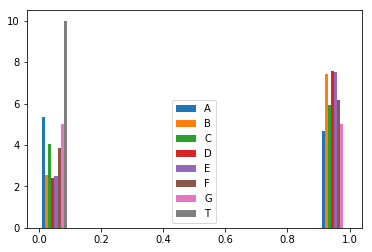

In [0]:
# plt.hist([A['Pclass'] , B['Pclass'] , C['Pclass'] , D['Pclass'] , E['Pclass'] , F['Pclass'] , G['Pclass'] , T['Pclass']] , density = True)
plt.hist([A['Survived'] , B['Survived'] , C['Survived'] , D['Survived'] , E['Survived'] , F['Survived'] , G['Survived'] , T['Survived']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()



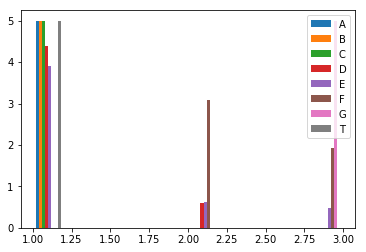

In [0]:
plt.hist([A['Pclass'] , B['Pclass'] , C['Pclass'] , D['Pclass'] , E['Pclass'] , F['Pclass'] , G['Pclass'] , T['Pclass']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()

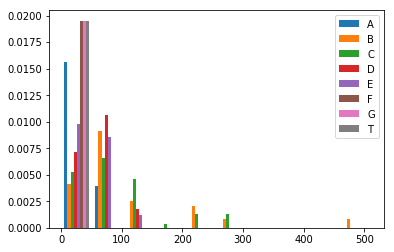

In [0]:
plt.hist([A['Fare'] , B['Fare'] , C['Fare'] , D['Fare'] , E['Fare'] , F['Fare'] , G['Fare'] , T['Fare']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()

In [0]:
# # A B C D E T  =1 
# # F =2 
# # G =3

# X_train.loc[(X_train['Cabin'].isnull()) & (X_train['Pclass']==1) , 'Cabin']  = 'A'
# X_train.loc[(X_train['Cabin'].isnull()) & (X_train['Pclass']==2) , 'Cabin']  = 'F'
# X_train.loc[(X_train['Cabin'].isnull()) & (X_train['Pclass']==3) , 'Cabin']  = 'G'


# --------------------------------------

In [0]:

data_train.drop("Survived" , axis= 1 , inplace=True)


In [31]:
# Fare이 0 값인건 이상값이라고 생각하고 means 값을 넣겠다.
# print(X_train.loc[X_train['Fare'] == 0 , :] )

# # 0값을 nan값으로만들고 값을넌다
X_train.loc[X_train['Fare'] == 0 , 'Fare'] = float('nan')

means = X_train.groupby('Pclass').Fare.mean()
X_train = X_train.set_index(['Pclass'])
X_train['Fare'] = X_train['Fare'].fillna(means)
X_train = X_train.reset_index()
print(means)

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64


In [0]:

# 891개의 데이터중에 687개가 null 값이니 없애버린다

X_train.drop("Cabin" , axis = 1 , inplace=True)
X_test.drop("Cabin" , axis = 1 , inplace=True)

In [35]:
X_train.describe()

,Pclass,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,446.000000,29.699118,0.523008,0.381594,32.893375
std,0.836071,257.353842,14.526497,1.102743,0.806057,49.700581
min,1.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,2.000000,223.500000,20.125000,0.000000,0.000000,7.925000
50%,3.000000,446.000000,28.000000,0.000000,0.000000,14.500000
75%,3.000000,668.500000,38.000000,1.000000,0.000000,31.275000
max,3.000000,891.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
X_train['Sex'].unique()
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
# 이름을 Mr, Mss 들 로만
f = lambda x : x.split(",")[1].split(".")[0].strip()
X_train['Name'] = X_train['Name'].apply(f)
X_test['Name'] = X_test['Name'].apply(f)


In [38]:
X_train['Name'].unique()
X_train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Capt              1
Sir               1
Don               1
Ms                1
Lady              1
the Countess      1
Jonkheer          1
Name: Name, dtype: int64

In [39]:
X_train.loc[(X_train['Sex']=='male') & (X_train['Name'] =="Mrs")]
X_train.loc[(X_train['Sex']=='male') & (X_train['Name'] =="Miss")]
X_train.loc[(X_train['Sex']=='female') & (X_train['Name'] =="Mr")]
X_train.loc[(X_train['Sex']=='female') & (X_train['Name'] =="Master")]



,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [40]:
# Age의 결측치들을 이름의 평균 나이로 넣어준다
means = X_train.groupby('Name').Age.mean()
print(means)

X_train = X_train.set_index(['Name'])
X_train['Age'] = X_train['Age'].fillna(means)
X_train = X_train.reset_index()
#위의 코드는 Name을 기준으로 Age값의 평균을 구한다음 그 평균값들을 맞는 Name에 Nan값에 넣어주는 코드


X_test = X_test.set_index(['Name'])
X_test['Age'] = X_test['Age'].fillna(means)
X_test = X_test.reset_index()

Name
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [0]:
# PClass를 문자형으로  =>  더 성능안좋아짐
# z = lambda x : str(x) 
# X_train['Pclass'] = X_train['Pclass'].apply(z)
# X_test['Pclass'] = X_test['Pclass'].apply(z)

In [0]:
# 여기는 그냥 최빈값으로 결측치를 채웠다.
# X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0] , inplace=True)


In [43]:
print(X_train.isna().sum())




X_train

Name           0
Pclass         0
PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,Name,Pclass,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,Mr,3,1,male,22.000000,1,0,A/5 21171,7.2500,S
1,Mrs,1,2,female,38.000000,1,0,PC 17599,71.2833,C
2,Miss,3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,Mrs,1,4,female,35.000000,1,0,113803,53.1000,S
4,Mr,3,5,male,35.000000,0,0,373450,8.0500,S
5,Mr,3,6,male,32.368090,0,0,330877,8.4583,Q
6,Mr,1,7,male,54.000000,0,0,17463,51.8625,S
7,Master,3,8,male,2.000000,3,1,349909,21.0750,S
8,Mrs,3,9,female,27.000000,0,2,347742,11.1333,S
9,Mrs,2,10,female,14.000000,1,0,237736,30.0708,C


Index(['Pclass', 'PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


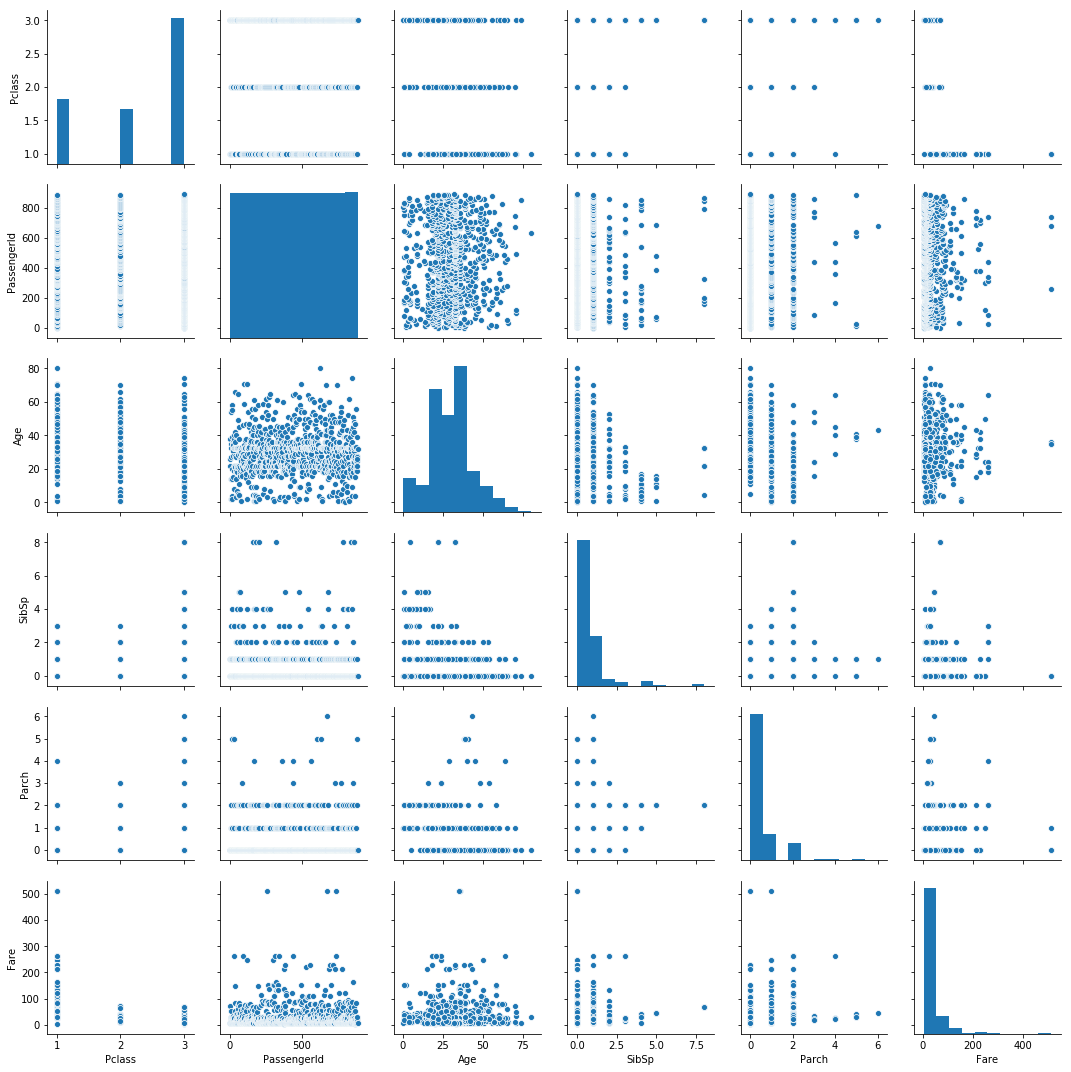

In [44]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=[np.object]).columns

print(numerical_features)
print(categorical_features)

sns.pairplot(X_train[numerical_features])

-0.005006660767066504


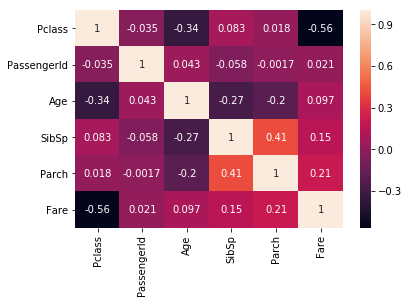

In [45]:
sns.heatmap(X_train[numerical_features].corr(), annot=True)
print(X_train["PassengerId"].corr(y_train))


In [0]:
# 그래프도 그렇고 상관관계도 그렇고 PassengerId는 빼도 될거같다는 느낌이
X_train.drop("PassengerId" , axis = 1 , inplace=True)
X_test.drop("PassengerId" , axis = 1 , inplace=True)

# 이름도 Sex로인해 성별 구별하니 지워도 될듯
X_train.drop("Name" , axis = 1 , inplace=True)
X_test.drop("Name" , axis = 1 , inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d2e251ac8>,
      dtype=object)

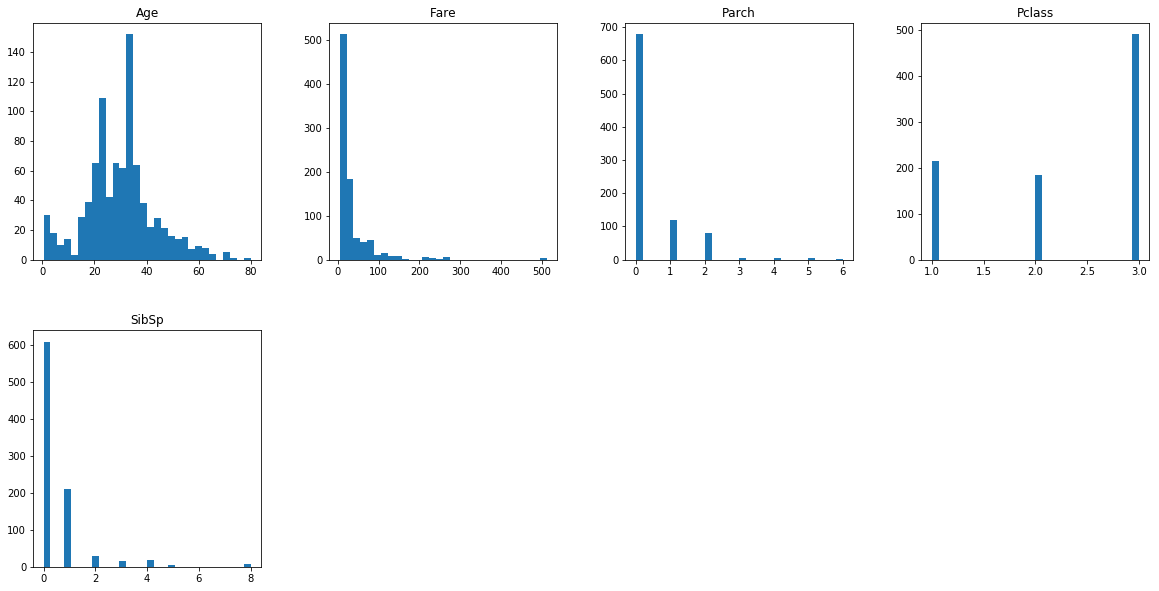

In [47]:
X_train.hist(figsize=(20,10) , grid=False , layout=(2,4), bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d28a89278>,
      dtype=object)

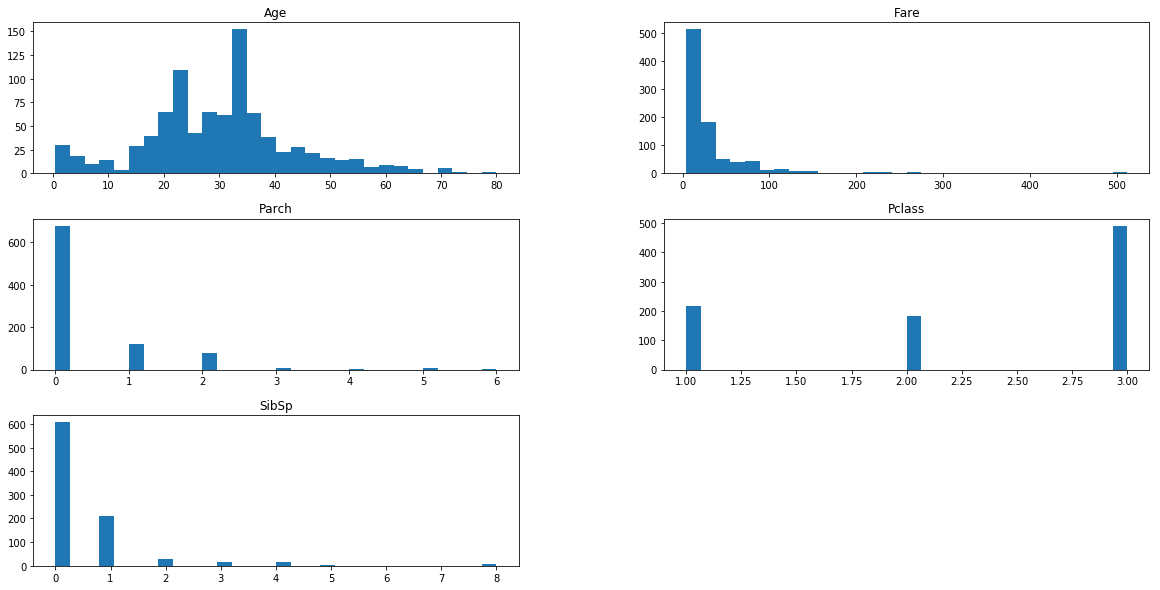

In [48]:

X_train.hist(figsize=(20,10) , grid=False , bins = 30)


In [49]:
Male_train = X_train.loc[X_train['Sex']=='male']
Female_train = X_train.loc[X_train['Sex']=='female']

Male_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.00000,1,0,A/5 21171,7.2500,S
4,3,male,35.00000,0,0,373450,8.0500,S
5,3,male,32.36809,0,0,330877,8.4583,Q
6,1,male,54.00000,0,0,17463,51.8625,S
7,3,male,2.00000,3,1,349909,21.0750,S
12,3,male,20.00000,0,0,A/5. 2151,8.0500,S
13,3,male,39.00000,1,5,347082,31.2750,S
16,3,male,2.00000,4,1,382652,29.1250,Q
17,2,male,32.36809,0,0,244373,13.0000,S
20,2,male,35.00000,0,0,239865,26.0000,S


In [50]:
means = list()
means.append(np.mean(Male_train))
means.append(np.mean(Female_train))

means = pd.DataFrame( means , columns = Male_train.columns )

print(means)


     Pclass  Sex        Age     SibSp     Parch  Ticket       Fare  Embarked
0  2.389948  NaN  30.903413  0.429809  0.235702     NaN  26.588101       NaN
1  2.159236  NaN  27.643731  0.694268  0.649682     NaN  44.479818       NaN


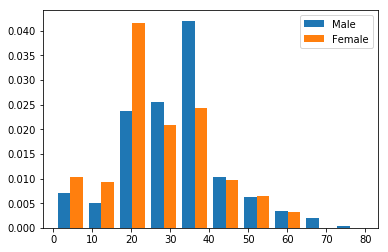

In [51]:
plt.hist([Male_train["Age"] , Female_train["Age"] ], density= True)
plt.legend(['Male' , 'Female'])
plt.show()


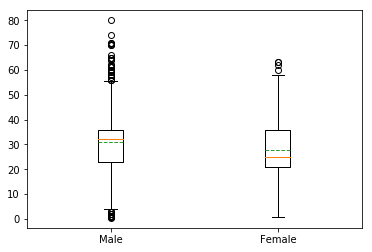

In [52]:
plt.boxplot([Male_train["Age"] , Female_train["Age"]] , labels=['Male' , 'Female'] , meanline = True , showmeans = True)
plt.show()

# 저 Outlier 들을 M3 값? 으로 바꿔주는? 아.. 저건 Outlier가 아닌가?


In [0]:
# plt.hist([Male_train["Age"] , Female_train["Age"] ], density= True)
# plt.legend(['Male' , 'Female'])
# plt.show()

MaleY_train = y_train[Male_train.index]
FemaleY_train = y_train[Female_train.index]


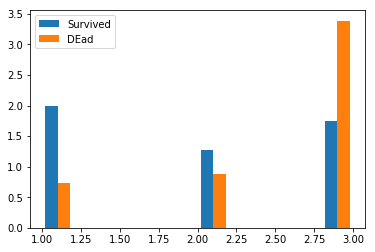

In [54]:
# Male_train.hist(figsize=(20,10) , grid=False , layout=(2,4), bins = 30)


All_train = pd.concat([X_train , y_train] ,axis =1)

survived = All_train.loc[All_train['Survived']==1]
dead = All_train.loc[All_train['Survived']==0]

plt.hist([survived['Pclass'] , dead['Pclass']] , density = True)
plt.legend(['Survived' , 'DEad'])
plt.show()


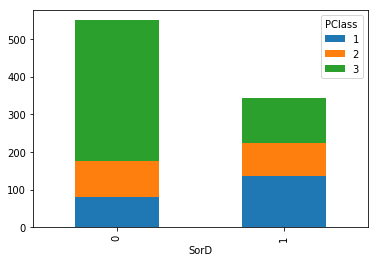

In [55]:
df = pd.DataFrame({'SorD':All_train['Survived'],'PClass':All_train['Pclass']}) 
ct = pd.crosstab(df.SorD, df.PClass) 

ct.plot.bar(stacked=True) 

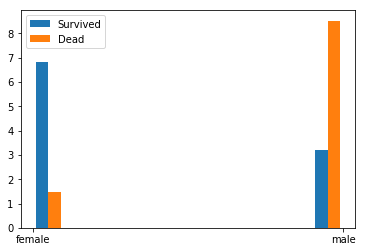

In [56]:

plt.hist([survived['Sex'] , dead['Sex']] , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()

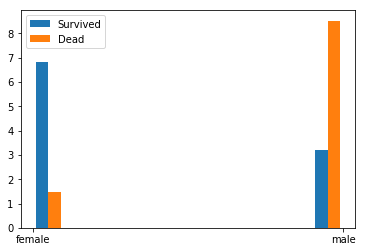

In [57]:

plt.hist([survived['Sex'] , dead['Sex']] , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()

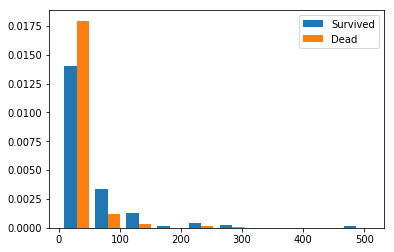

In [58]:

plt.hist([survived['Fare'] , dead['Fare']] , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()



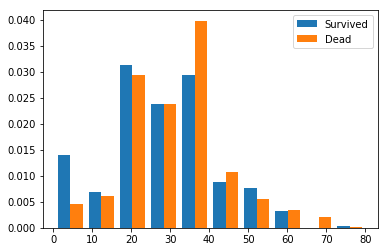

In [59]:

plt.hist([survived['Age'] , dead['Age']] , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()



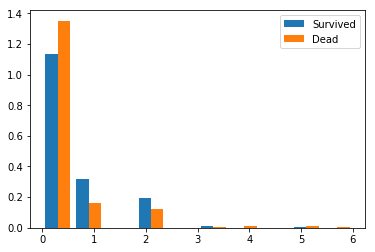

In [60]:

plt.hist([survived['Parch'] , dead['Parch']]  , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()

In [0]:
# Ticket 도 쓸모없어보여서 drop
X_train.drop("Ticket" , axis= 1 , inplace=True)
X_test.drop("Ticket" , axis= 1 , inplace=True)

In [62]:
# Test Fare은 null값이 1개라서 그냥 최빈값으로 
# X_test['Fare'].fillna(X_test['Fare'].mode()[0] , inplace=True)



# Test Fare을 Pclass의 평균값으로 대체
means = round(X_train.groupby('Pclass').Fare.mean())
print(means)

# Fare을 Pclass에 따라
means = X_train.groupby('Pclass').Fare.mean()
X_test = X_test.set_index(['Pclass'])
X_test['Fare'] = X_test['Fare'].fillna(means)
X_test = X_test.reset_index()



Pclass
1    86.0
2    21.0
3    14.0
Name: Fare, dtype: float64


In [0]:
# 여기서 skewed 니까 scaling을 해줄까 ?   =>   랜덤포레스트는 스케일 맞출필요없다는데 하니까 좀 올라가는듯..?
X_train['Fare'] = np.log(1+X_train['Fare'])
X_train['SibSp'] = np.log(1+X_train['SibSp'])
X_train['Parch'] = np.log(1+X_train['Parch'])
X_test['Fare'] = np.log(1+X_test['Fare'])
X_test['SibSp'] = np.log(1+X_test['SibSp'])
X_test['Parch'] = np.log(1+X_test['Parch'])


In [64]:
# X_train
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train

#a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).
# 그럼 랜덤포레스트에서도 안바꿔줘도 상관없는건가?

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,0.693147,0.000000,2.110213,0,1,0,0,1
1,1,38.000000,0.693147,0.000000,4.280593,1,0,1,0,0
2,3,26.000000,0.000000,0.000000,2.188856,1,0,0,0,1
3,1,35.000000,0.693147,0.000000,3.990834,1,0,0,0,1
4,3,35.000000,0.000000,0.000000,2.202765,0,1,0,0,1
5,3,32.368090,0.000000,0.000000,2.246893,0,1,0,1,0
6,1,54.000000,0.000000,0.000000,3.967694,0,1,0,0,1
7,3,2.000000,1.386294,0.693147,3.094446,0,1,0,0,1
8,3,27.000000,0.000000,1.098612,2.495954,1,0,0,0,1
9,2,14.000000,0.693147,0.000000,3.436268,1,0,1,0,0


## GridSearch

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

trnx, valx, trny, valy = train_test_split(X_train, y_train, test_size=0.3, random_state=510)

In [66]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,0.693147,0.000000,2.110213,0,1,0,0,1
1,1,38.000000,0.693147,0.000000,4.280593,1,0,1,0,0
2,3,26.000000,0.000000,0.000000,2.188856,1,0,0,0,1
3,1,35.000000,0.693147,0.000000,3.990834,1,0,0,0,1
4,3,35.000000,0.000000,0.000000,2.202765,0,1,0,0,1
5,3,32.368090,0.000000,0.000000,2.246893,0,1,0,1,0
6,1,54.000000,0.000000,0.000000,3.967694,0,1,0,0,1
7,3,2.000000,1.386294,0.693147,3.094446,0,1,0,0,1
8,3,27.000000,0.000000,1.098612,2.495954,1,0,0,0,1
9,2,14.000000,0.693147,0.000000,3.436268,1,0,1,0,0


In [0]:

param = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

CV_rfc = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 42), param_grid=param, cv= 5)
CV_rfc.fit(trnx,trny)
CV_rfc.best_params_ , CV_rfc.best_score_

KeyboardInterrupt: ignored

In [0]:

param= {
          'n_estimators': [300, 400, 500, ],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth': [3,4,5,6,8 ]
 }

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=param, cv= 5)
CV_rfc.fit(trnx,trny)
CV_rfc.best_params_ , CV_rfc.best_score_

In [67]:

forest = GradientBoostingClassifier(loss = "deviance" , learning_rate = 0.075 , criterion = 'mae' , max_depth = 5 , max_features = 'log2' , min_samples_leaf = 0.1 , min_samples_split = 0.24545 , n_estimators = 10 , subsample = 0.85)
forest.fit(trnx,trny)

print("train : {} ".format(forest.score(trnx,trny)))

print("validation : {} ".format(forest.score(valx,valy)))


train : 0.7913322632423756 
validation : 0.7761194029850746 


In [68]:

forest = RandomForestClassifier(n_estimators = 400, random_state = 42 , max_depth=8, max_features='auto')
forest.fit(trnx,trny)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [69]:
print("train : {} ".format(forest.score(trnx,trny)))

print("validation : {} ".format(forest.score(valx,valy)))


train : 0.9197431781701445 
validation : 0.8134328358208955 


## Model 적용

In [70]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 400, random_state = 42 , max_depth=8, max_features='auto')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
result = forest.predict(X= X_test)

submission = pd.DataFrame({"PassengerId":test_PassengerId  , "Survived" : result})


submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [0]:
submission.to_csv("result.csv" ,index=False)
!sudo cp result.csv /content/gdrive/My\ Drive/datascience/task/titanic/data/result.csv


In [73]:

print("특성 중요도 : \n{}".format(forest.feature_importances_))

feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances


# 랜덤포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.
# 포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.


특성 중요도 : 
[0.11683329 0.17184747 0.05284064 0.03724713 0.18140327 0.1879731
 0.21283056 0.01388437 0.00902837 0.01611179]


,importance
Sex_male,0.212831
Sex_female,0.187973
Fare,0.181403
Age,0.171847
Pclass,0.116833
SibSp,0.052841
Parch,0.037247
Embarked_S,0.016112
Embarked_C,0.013884
Embarked_Q,0.009028


/bin/bash: line 0: cd: sampledata: No such file or directory
gdrive	sample_data
